In [1]:
import numpy as np
from TDD.TDD2 import Ini_TDD,Clear_TDD,set_index_order,get_tdd,to_cnf2
# ,renorm
from TDD.TDD_Q2 import cir_2_tn,get_real_qubit_num,add_trace_line,add_inputs,add_outputs
from TDD.TDD_Q2 import reshape as reshape2
from TDD.TN2 import Index,Tensor,TensorNetwork
import time
import random
from qiskit import QuantumCircuit
from sympy import *
from sympy.parsing.sympy_parser import parse_expr

In [2]:
import sympy
sympy.__version__

'1.5.1'

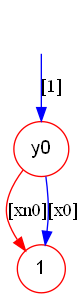

In [3]:
Ini_TDD(['x0','y0','x1','y1'])
A=['x0','y0','x1','y1','xn0']
[x0,y0,x1,y1,xn0]=symbols(A)
U=np.array([xn0,x0])
var=[Index('y0')]
ts1=Tensor(U,var)
ts1.tdd().show()
# ts2=Tensor(U,var)

-------------
x0 + xn0
[1.0*x0 + 1.0*xn0]
-------------
-------------
0.707107*x0 + 0.707107*xn0
[0.707107*x0 + 0.707107*xn0]
-------------
-------------
0.707107*xn0
[0.707107*xn0]
-------------
-------------
-0.707107*x0
[-0.707107*x0]
-------------
-------------
-0.707107*x0 + 0.707107*xn0
[-0.707107*x0 + 0.707107*xn0]
-------------


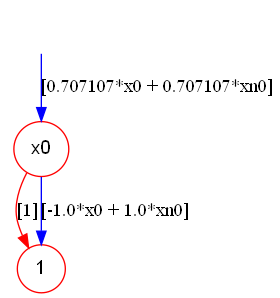

In [4]:
H=1/np.sqrt(2)*np.array([[1,1],[1,-1]])
var2=[Index('x0'),Index('y0')]
ts2=Tensor(H,var2)
# ts2.tdd().show()
tn=TensorNetwork([ts1,ts2])
tdd=tn.cont()
tdd.show()
# Clear_TDD()

-------------
0.707107*xn0
[0.707107*xn0]
-------------
-------------
0.707107*x0
[0.707107*x0]
-------------
-------------
0.707107*x0 + 0.707107*xn0
[0.707107*x0 + 0.707107*xn0]
-------------
-------------
-0.707107*x0
[-0.707107*x0]
-------------
-------------
-0.707107*x0 + 0.707107*xn0
[-0.707107*x0 + 0.707107*xn0]
-------------
-------------
I*x1
[1.0*I, x1]
-------------
-------------
0.707107*xn1
[0.707107*xn1]
-------------
-------------
0.707107*x1
[0.707107*x1]
-------------
-------------
0.707107*x1 + 0.707107*xn1
[0.707107*x1 + 0.707107*xn1]
-------------
-------------
-0.707107*x1
[-0.707107*x1]
-------------
-------------
-0.707107*x1 + 0.707107*xn1
[-0.707107*x1 + 0.707107*xn1]
-------------
-------------
0.707107*xn1
[0.707107*xn1]
-------------
-------------
0.707107*I*x1
[0.707107*I, x1]
-------------
-------------
0.707107*I*x1 + 0.707107*xn1
[0.707107*I*x1 + 0.707107*xn1]
-------------
-------------
-0.707107*I*x1
[-0.707107*I, x1]
-------------
-------------
-0.70

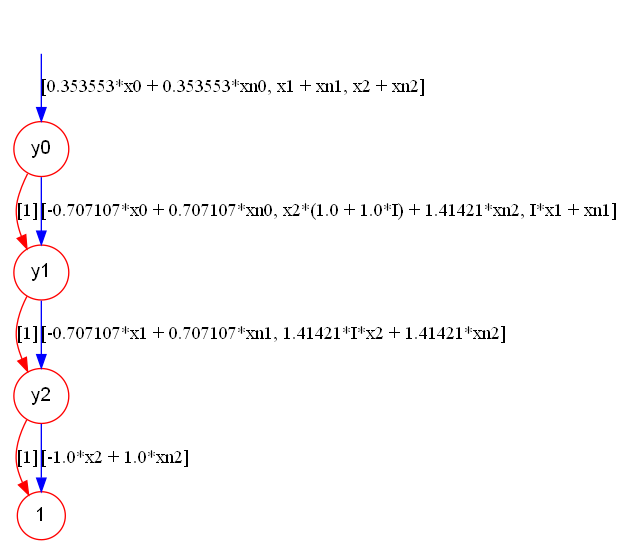

In [5]:
path='Benchmarks/'
file_name='qft_3.qasm'
cir=QuantumCircuit.from_qasm_file(path+file_name)
tn,indices=cir_2_tn(cir)
for k in range(3):
    x_k='x'+str(k)
    xn_k='xn'+str(k)
    s=Symbol(x_k)
    ns=Symbol(xn_k)
    U=np.array([ns,s])
#     U=np.array([1,0])
    temp_ts=Tensor(U,[Index(x_k)])
    tn.tensors.insert(0,temp_ts)
Ini_TDD(indices)

## bug...occurs
tdd=tn.cont()

# tdd=renorm(tdd)
tdd.show()

In [ ]:
print(470832/665857)
print(665857/941664)

In [ ]:
A=['x0','xn0','x1','xn1']
[x0,xn0,x1,xn1]=symbols(A)
s=470832*I*(-x0 + xn0)*(x1 - I*xn1)/665857
# type(s)
#help(factor_list)
factor_list(s, gaussian=True)


In [ ]:
x=symbols('x1')
nx=symbols('xn1')
y=symbols('x2')
ny=symbols('xn2')
s=2*x+3*nx+2*x*y+3*nx*y+2*x*ny+3*nx*ny+(0.0000001+0.0000001*I)*nx
print(s)
t=to_cnf2(s,n=2)
print(t)
print(t[0]*t[1])

In [ ]:
s=x*2+x*y
print(s)
print(to_cnf2(s))

In [ ]:
s=2*x+3*nx+2*x*y+3*nx*y+2*x*ny+3*nx*ny+I*x*(y+ny+1)
s=nsimplify(s,tolerance=1e-4,rational=False)
factor(s)
sm=[str(item) for item in s.free_symbols]
ss=2*symbols(sm[0])
ss

In [ ]:
x=symbols('x1')
nx=symbols('xn1')
y=symbols('x2')
ny=symbols('xn2')
s=float('%.4f'%np.sqrt(2))*x
# s=nsimplify(s,tolerance=1e-4,rational=False)
s

In [ ]:
type(x+nx)